In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np

data_path = r'.\data\Processed_data\processed_data.shp'
shape_data = gpd.read_file(data_path)
# shape_data.head(1)
# shape_data.info()

In [15]:
# check if still has missing data
shape_data[shape_data.isnull().values==True]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,distance,circle,COVID,population,BEDS,...,% Fair or,% Uninsure,Primary Ca,Preventabl,% Vaccinat,% Unemploy,Social Ass,Average Da,Life Expec,geometry
422,Shannon,South Dakota,46,113,46113,206327.093587,2,0,0.0,45.0,...,13.582869,13.212252,2137.140043297725,5097.122164,36.628486,3.482781,14.677685,5.952256,78.094864,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
1663,Bedford City,Virginia,51,515,51515,185666.412210,2,0,0.0,50.0,...,16.695872,11.292814,2821.874119452896,4809.796886,48.438430,3.388950,12.450078,8.951746,77.619836,"POLYGON ((-79.49441 37.33362, -79.49787 37.311..."


In [16]:
X_ols = pd.DataFrame(shape_data[[ 'population', 'Primary Ca',  'Social Ass','Preventabl','COVID', 'Life Expec','circle',
                                 '% Fair or','% Uninsure', '% Vaccinat', '% Unemploy', 'Average Da','health_out','health_beh','clinical_c' ]])
X_ols['Primary Ca'] = pd.to_numeric(X_ols['Primary Ca'])
X_ols['health_out'] = pd.to_numeric(X_ols['health_out'])
X_ols['health_beh'] = pd.to_numeric(X_ols['health_beh'])
X_ols['clinical_c'] = pd.to_numeric(X_ols['clinical_c'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_ols.values, i) for i in range(X_ols.shape[1])]
vif["features"] = X_ols.columns
vif.round(1)

,VIF Factor,features
0,1.4,population
1,2.8,Primary Ca
2,5.7,Social Ass
3,12.7,Preventabl
4,1.1,COVID
5,66.5,Life Expec
6,3.3,circle
7,39.4,% Fair or
8,12.7,% Uninsure
9,30.6,% Vaccinat


In [17]:
X_ols = pd.DataFrame(shape_data[[ 'population', 'Social Ass', 'Primary Ca',  'COVID', 'circle','health_out', 'health_beh', 'clinical_c' ]])
X_ols['Primary Ca'] = pd.to_numeric(X_ols['Primary Ca'])
X_ols['health_out'] = pd.to_numeric(X_ols['health_out'])
X_ols['health_beh'] = pd.to_numeric(X_ols['health_beh'])
X_ols['clinical_c'] = pd.to_numeric(X_ols['clinical_c'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_ols.values, i) for i in range(X_ols.shape[1])]
vif["features"] = X_ols.columns
vif.round(1)

,VIF Factor,features
0,1.2,population
1,2.6,Social Ass
2,2.3,Primary Ca
3,1.1,COVID
4,2.5,circle
5,8.0,health_out
6,6.9,health_beh
7,4.9,clinical_c


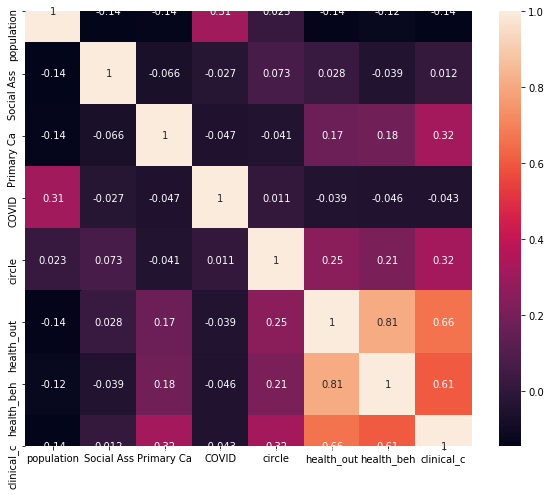

In [18]:
X_ols = pd.DataFrame(shape_data[[ 'population', 'Social Ass', 'Primary Ca',  'COVID', 
                                 'circle','health_out', 'health_beh', 'clinical_c' ]])

X_ols['health_out'] = pd.to_numeric(X_ols['health_out'])
X_ols['health_beh'] = pd.to_numeric(X_ols['health_beh'])
X_ols['clinical_c'] = pd.to_numeric(X_ols['clinical_c'])
X_ols['Primary Ca'] = pd.to_numeric(X_ols['Primary Ca'])

f=plt.figure(figsize=(10,8))
corrMatrix = X_ols.corr()
corrMatrix
sns.heatmap(corrMatrix, annot=True)

plt.savefig('pic/cor.png')
plt.show()

In [19]:
X_ols = pd.DataFrame(shape_data[[ 'population', 'Social Ass', 'Primary Ca',  'COVID', 
                                 'circle', 'health_beh', 'clinical_c' ]])

X_ols['Primary Ca'] = pd.to_numeric(X_ols['Primary Ca'])
#X_ols['health_out'] = pd.to_numeric(X_ols['health_out'])
X_ols['health_beh'] = pd.to_numeric(X_ols['health_beh'])
X_ols['clinical_c'] = pd.to_numeric(X_ols['clinical_c'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_ols.values, i) for i in range(X_ols.shape[1])]
vif["features"] = X_ols.columns
vif.round(1)

,VIF Factor,features
0,1.2,population
1,2.6,Social Ass
2,2.3,Primary Ca
3,1.1,COVID
4,2.5,circle
5,3.5,health_beh
6,4.3,clinical_c


                                 OLS Regression Results                                
Dep. Variable:                   BEDS   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              3969.
Date:                Sat, 13 Jun 2020   Prob (F-statistic):                        0.00
Time:                        13:25:53   Log-Likelihood:                         -22730.
No. Observations:                3109   AIC:                                  4.547e+04
Df Residuals:                    3102   BIC:                                  4.552e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

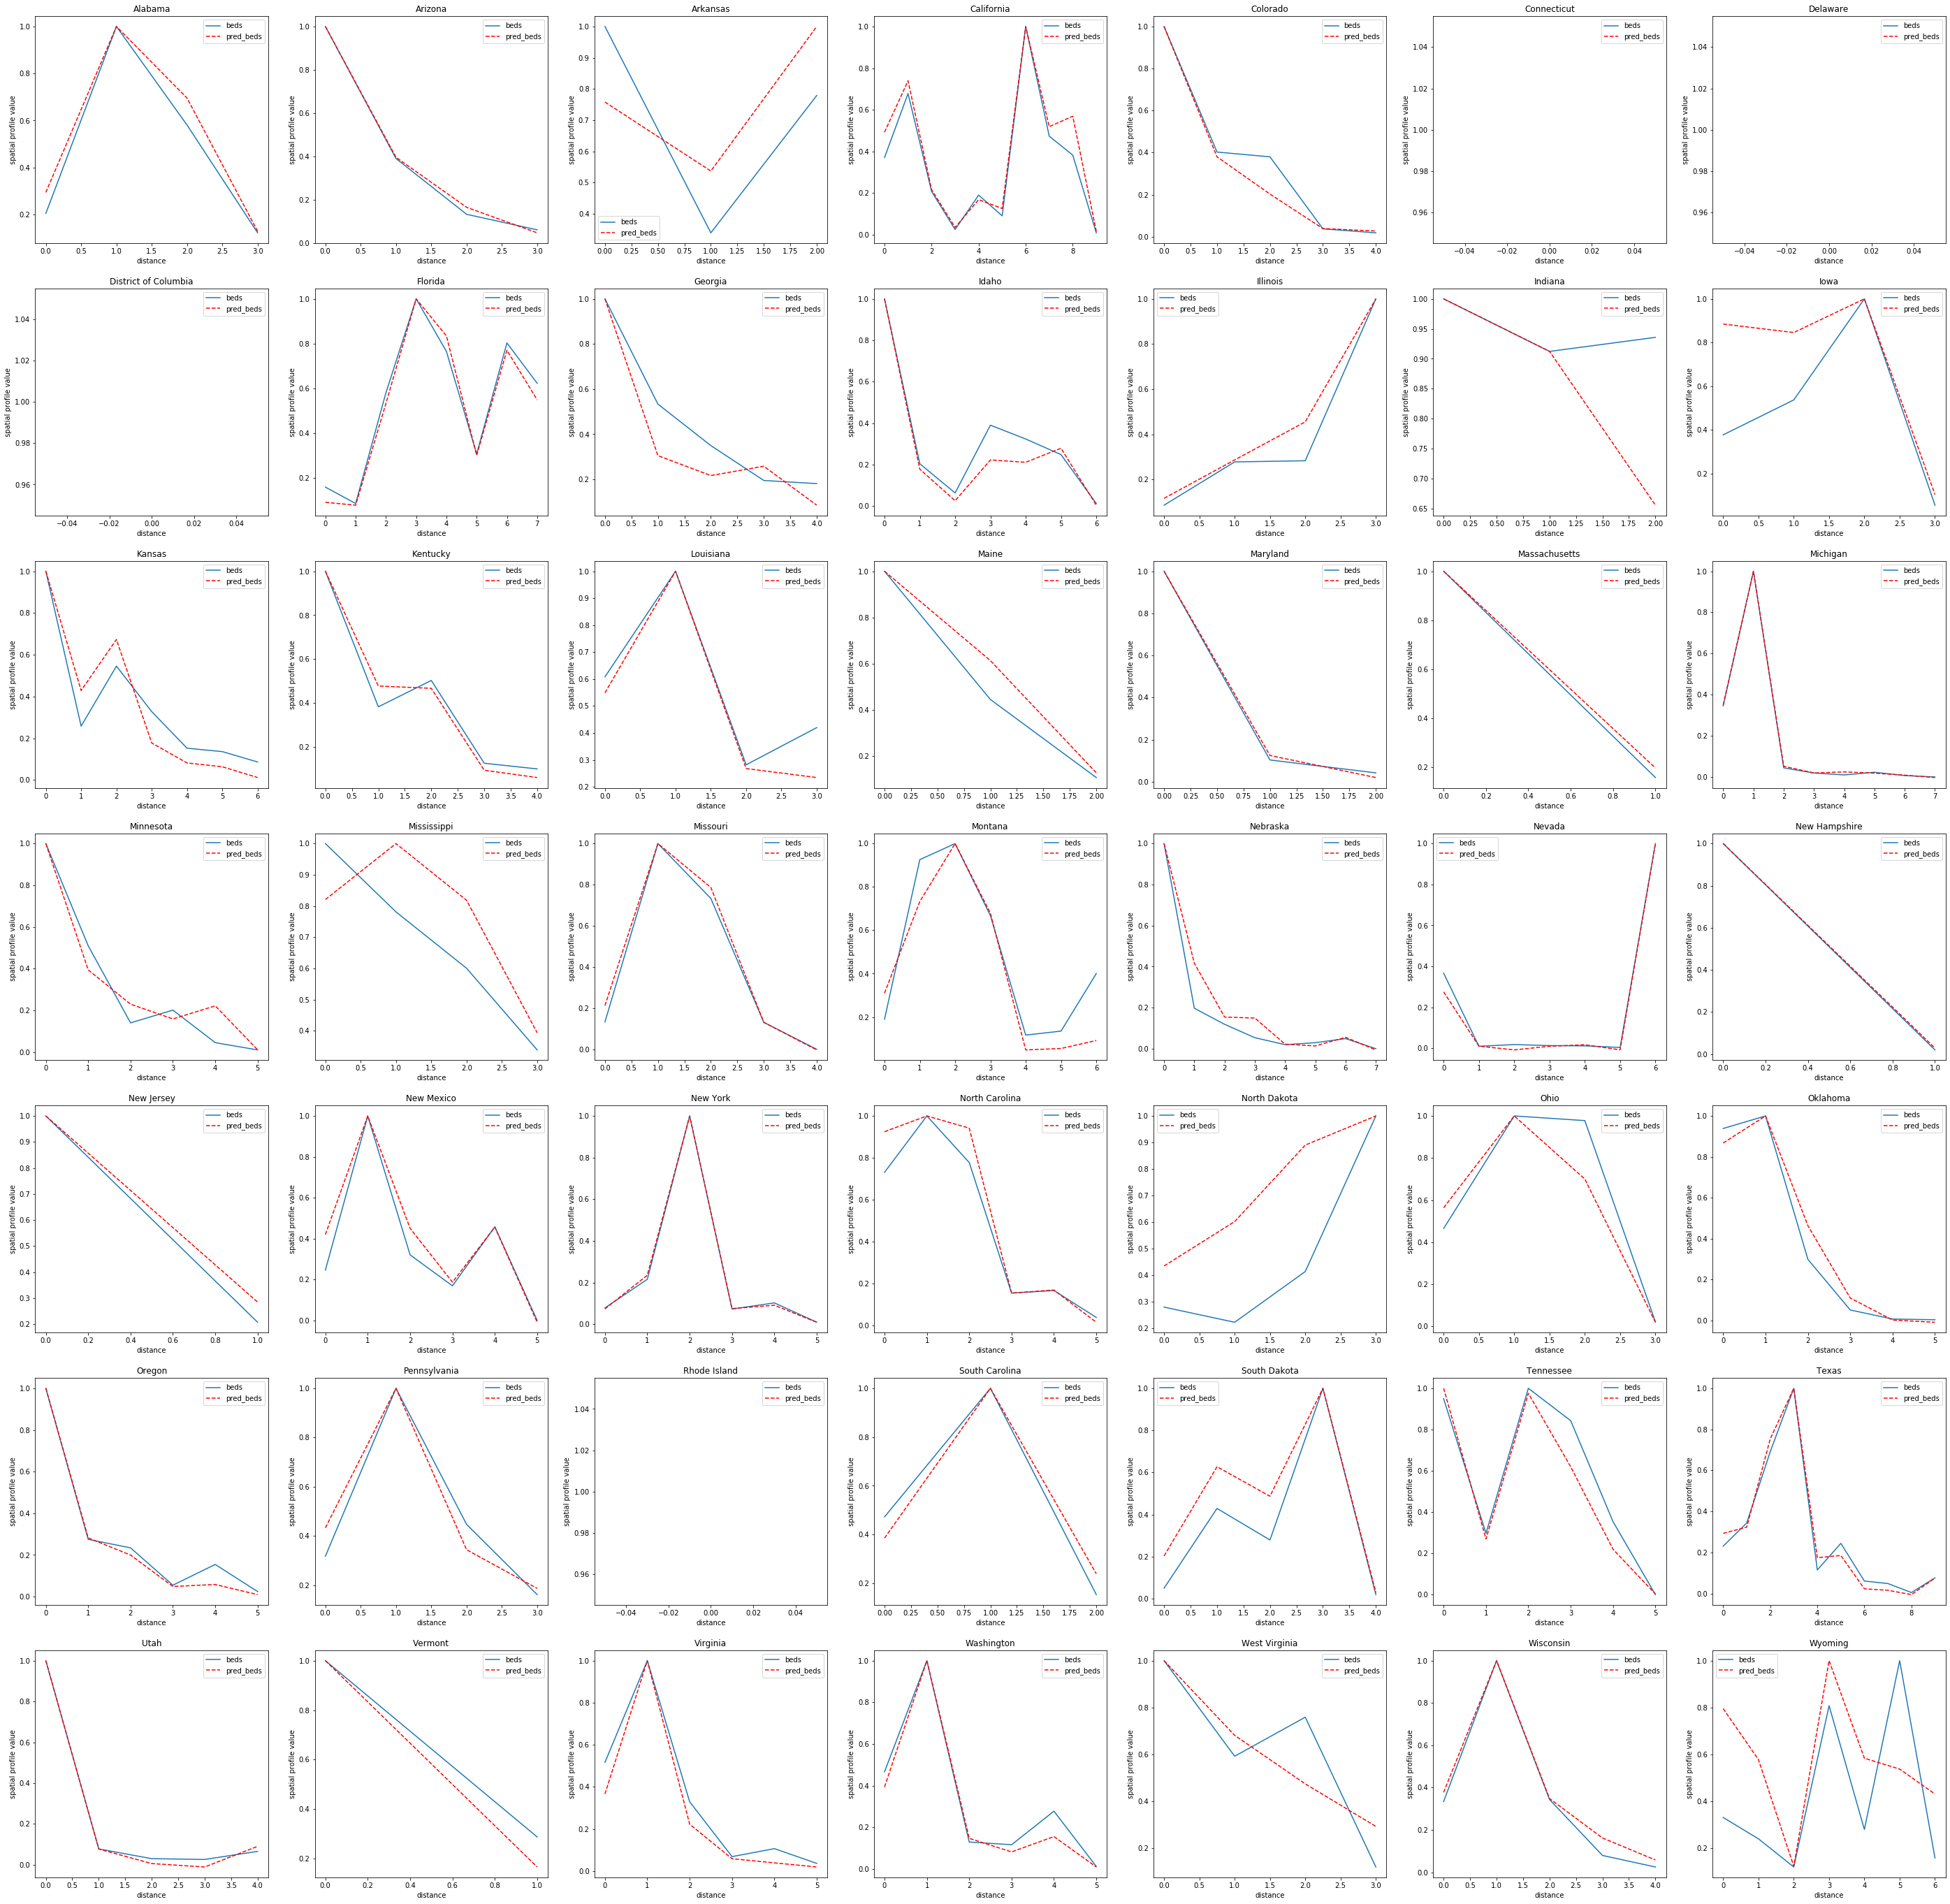

In [20]:
X_ols = pd.DataFrame(shape_data[[ 'population', 'Social Ass', 'Primary Ca',  
                                 'COVID', 'circle', 'health_beh', 'clinical_c' ]])
#'health_out','health_beh','clinical_c'
# Index(['const', 'population', 'Primary Ca', 'Social Ass', 'Preventabl',
#        'COVID', 'Life Expec', 'health_out', 'health_beh', 'clinical_c'],



#X_ols['health_out'] = pd.to_numeric(X_ols['health_out'])
X_ols['health_beh'] = pd.to_numeric(X_ols['health_beh'])
X_ols['clinical_c'] = pd.to_numeric(X_ols['clinical_c'])
X_ols['Primary Ca'] = pd.to_numeric(X_ols['Primary Ca'])


# X_ols = X_ols[['const', '% Fair or', 'population', 'Primary Ca', 'Social Ass',
#        'Preventabl', 'COVID', 'Life Expec', 'Rank']]

target = shape_data['BEDS']
ols_model = sm.OLS(target,X_ols)
res_ols = ols_model.fit()

#coefs_signif
print_model = res_ols.summary()
print(print_model)


# get statistically significant coefficients
feats_signif = res_ols.pvalues[res_ols.pvalues<0.05].index
coefs_signif = res_ols.params[feats_signif]
print(feats_signif)

predictions = res_ols.predict(X_ols)
shape_data['pred_beds']=predictions
circle_group_pred_beds = shape_data.groupby(["STATE_NAME","circle"])["pred_beds"].sum()
circle_group_bed = shape_data.groupby(["STATE_NAME","circle"])["BEDS"].sum()


## get the districution
bed_districution={}
for s in sorted(list(set(shape_data["STATE_NAME"]))):
    temp_state_bed= []
    for c in circle_group_bed[s].keys():
        temp_state_bed.append(circle_group_bed[s,c])
     
    bed_districution[s] = np.array(temp_state_bed)/max(temp_state_bed)


## get the districution
pred_beds_districution = {}
for s in sorted(list(set(shape_data["STATE_NAME"]))):
    temp_state_pred_beds = []
    for c in circle_group_bed[s].keys():
        temp_state_pred_beds.append(circle_group_pred_beds[s,c])
     
    pred_beds_districution[s] = np.array(temp_state_pred_beds)/max(temp_state_pred_beds)
    
    
%matplotlib inline
import matplotlib.pyplot as plt

states = sorted(list(set(shape_data["STATE_NAME"])))
f, ax = plt.subplots(7,7,figsize=(49,49))
ax = ax.flatten()
for i in range(len(states)):
    ax[i].plot(bed_districution[states[i]], label="beds")
    ax[i].plot(pred_beds_districution[states[i]], 'r--',label="pred_beds")
#    ax[i].fill_between(range(len(bed_districution[states[i]])), bed_districution[states[i]], pred_beds_districution[states[i]] )
    
    
    ax[i].set_xlabel('distance')
    ax[i].set_ylabel('spatial profile value')
    ax[i].set_title("{}".format(states[i]))
    ax[i].legend(loc="best")
f.savefig('pic/estimate.png')